In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits

## function definition

In [2]:
def sound_speed(Tk=10.,mu=2.33):
    return 0.0908537*np.sqrt(Tk/mu)

def transition_plots(region='B18', max_edv=0.15, min_snr=4.0):
    #load data
    Tp=fits.getdata('{0}/{0}_NH3_11_DR1_rebase3_Tpeak.fits'.format(region))
    rms=fits.getdata('{0}/{0}_NH3_11_DR1_rebase3_rms.fits'.format(region))
    param=fits.getdata('parameters/{0}_parameter_maps_DR1_rebase3_trim.fits'.format(region))
    dv=param[3,:,:]
    edv=param[9,:,:]
    Tk=param[0,:,:]
    eTk=param[6,:,:]
    # blank out bad points
    dv[dv==0]=np.nan
    dv_nt_cs=np.sqrt(dv**2 - sound_speed(Tk=Tk,mu=17.0)**2)/sound_speed(Tk=Tk,mu=2.33)
    #
    gd=(Tp>min_snr*rms)*(dv>0.05)*(edv<max_edv)*(Tp<10)
    gd2=(Tp>min_snr*rms)*(dv>0.05)*(edv<max_edv)*(Tp<10)*(np.isfinite(dv_nt_cs))
    dv[~gd]=np.nan
    # KDE calculation
    from scipy import stats
    xmin=0.0
    xmax=np.max(Tp[gd])
    ymin=0.0
    ymax=np.max(dv[gd])
    ymax_dv=np.max(dv_nt_cs[gd2])
    #
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    X2,Y2= np.mgrid[xmin:xmax:100j, ymin:ymax_dv:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    positions2= np.vstack([X2.ravel(), Y2.ravel()])
    values = np.vstack([Tp[gd], dv[gd]])
    values2= np.vstack([Tp[gd2], dv_nt_cs[gd2]])
    kernel = stats.gaussian_kde(values)
    kernel2= stats.gaussian_kde(values2)
    Z = np.reshape(kernel(positions).T, X.shape)
    Z2= np.reshape(kernel2(positions2).T, X2.shape)
    #
    fig0=plt.figure( figsize=( 15.0, 6.0) )
    ax0= plt.subplot()
    ax0.imshow(dv, origin='lower', vmin=0.05, vmax=0.5, cmap='viridis')
    #scatter plot for 
    fig1=plt.figure( figsize=( 12.0, 6.0) )
    ax1 = fig1.add_subplot(121)
    ax1.set_xlim([xmin, xmax])
    ax1.set_ylim([ymin, ymax])
    ax1.scatter(Tp[gd], dv[gd])
    #
    ax2 = fig1.add_subplot(122)
    ax2.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax], aspect='auto')
    ax2.set_xlim([xmin, xmax])
    ax2.set_ylim([ymin, ymax])
    plt.setp( ax1, xlabel="Peak temperature (K)")
    plt.setp( ax1, ylabel="velocity dispersion (km s$^{-1}$)")
    plt.setp( ax2, xlabel="Peak temperature (K)")
    plt.setp( ax2, ylabel="velocity dispersion (km s$^{-1}$)")
    #scatter plot for 
    fig2=plt.figure( figsize=( 12.0, 6.0) )
    ax3 = fig2.add_subplot(121)
    ax3.set_xlim([xmin, xmax])
    ax3.set_ylim([ymin, ymax_dv])
    ax3.scatter(Tp[gd2], dv_nt_cs[gd2])
    #
    ax4 = fig2.add_subplot(122)
    ax4.imshow(np.rot90(Z2), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax_dv], aspect='auto')
    ax4.axhline(y=1., color='red')
    ax4.axhline(y=0.5,color='red', ls='--')
    ax4.set_xlim([xmin, xmax])
    ax4.set_ylim([ymin, ymax_dv])
    plt.setp( ax3, xlabel="Peak temperature (K)")
    plt.setp( ax3, ylabel="velocity dispersion (km s$^{-1}$)")
    plt.setp( ax4, xlabel="Peak temperature (K)")
    plt.setp( ax4, ylabel="non-thermal velocity dispersion/sound speed")

## B18

/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


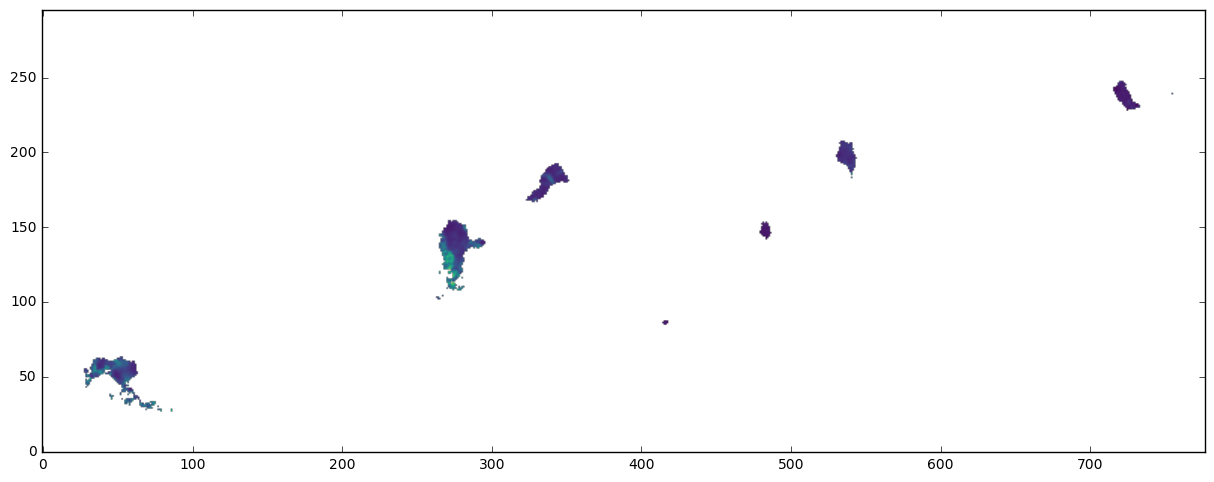

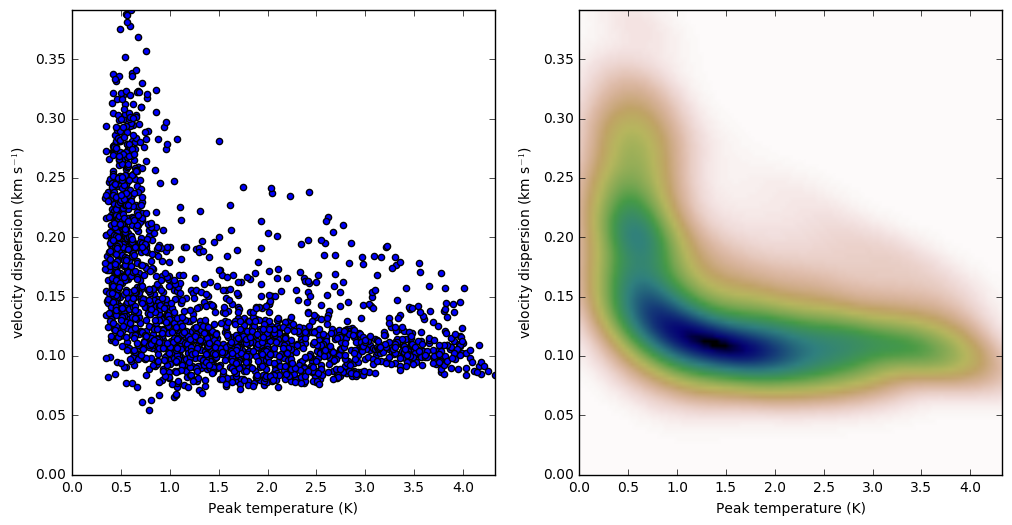

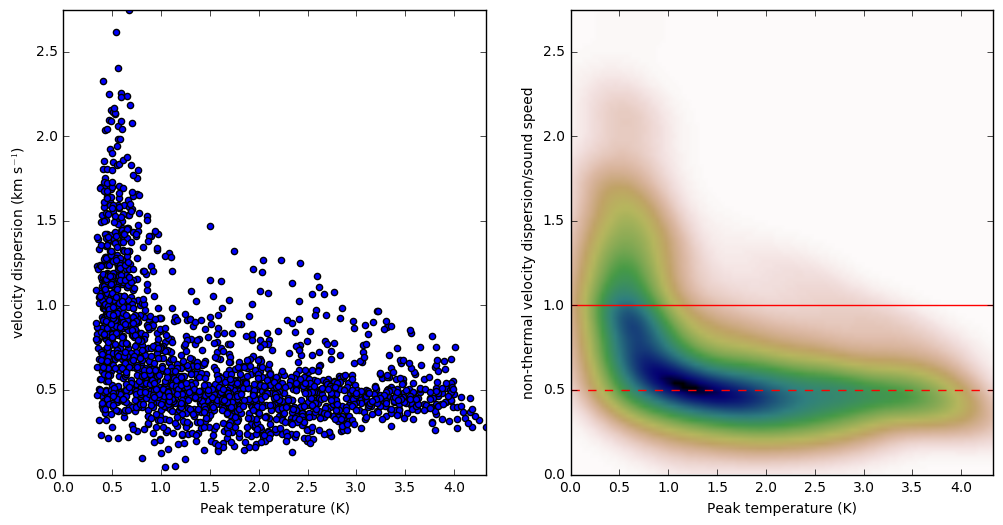

In [4]:
transition_plots(region='B18',max_edv=0.05)

## NGC1333

/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


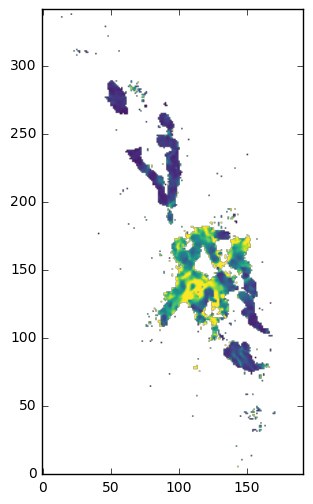

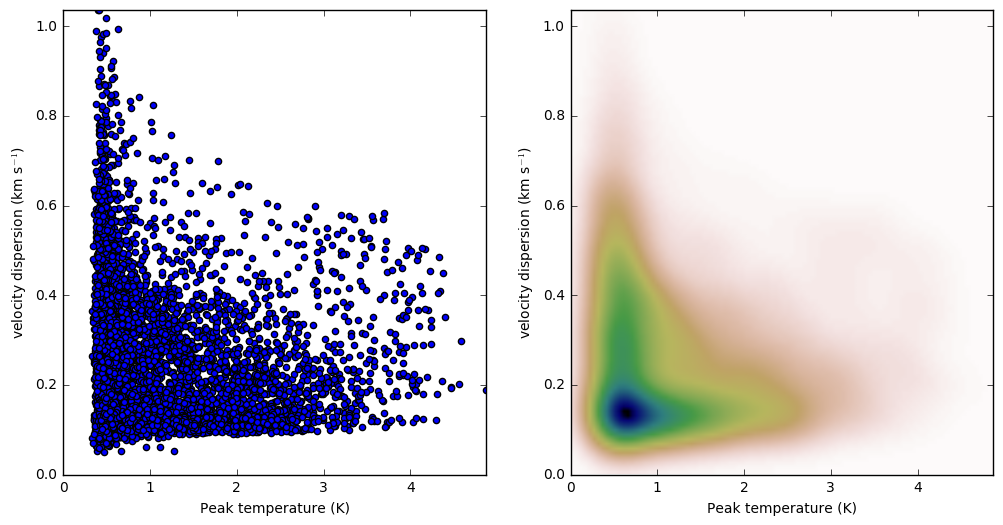

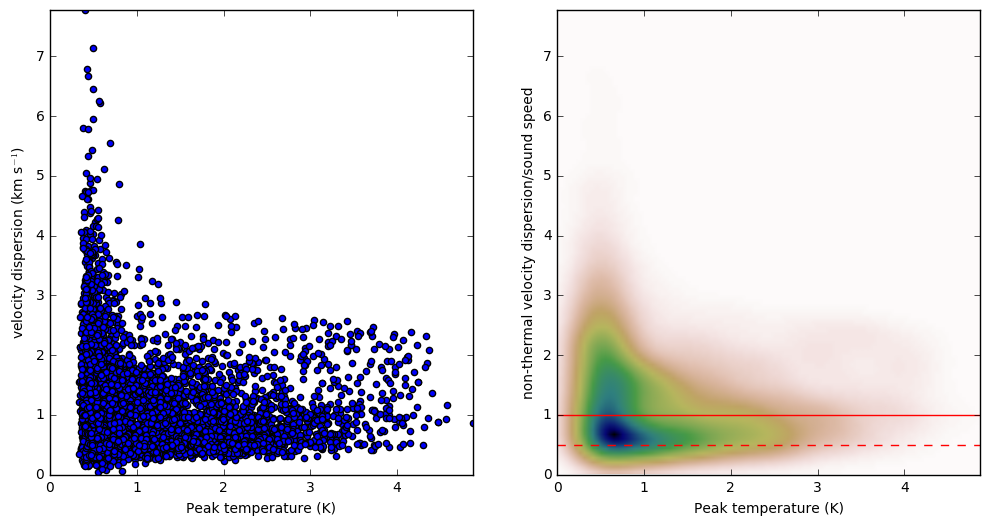

In [5]:
transition_plots(region='NGC1333')

## L1688

/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


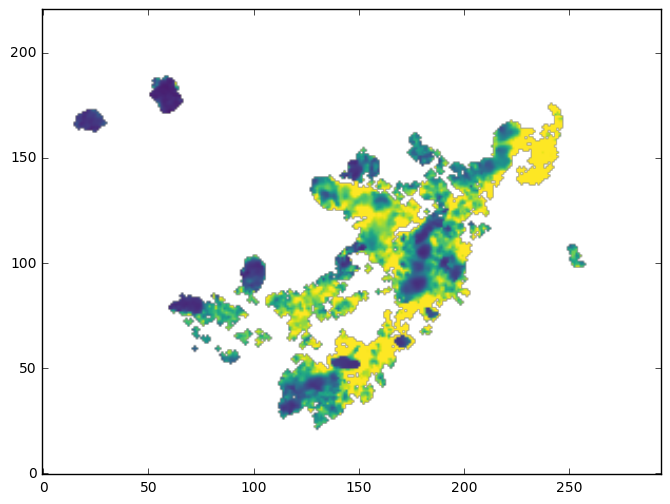

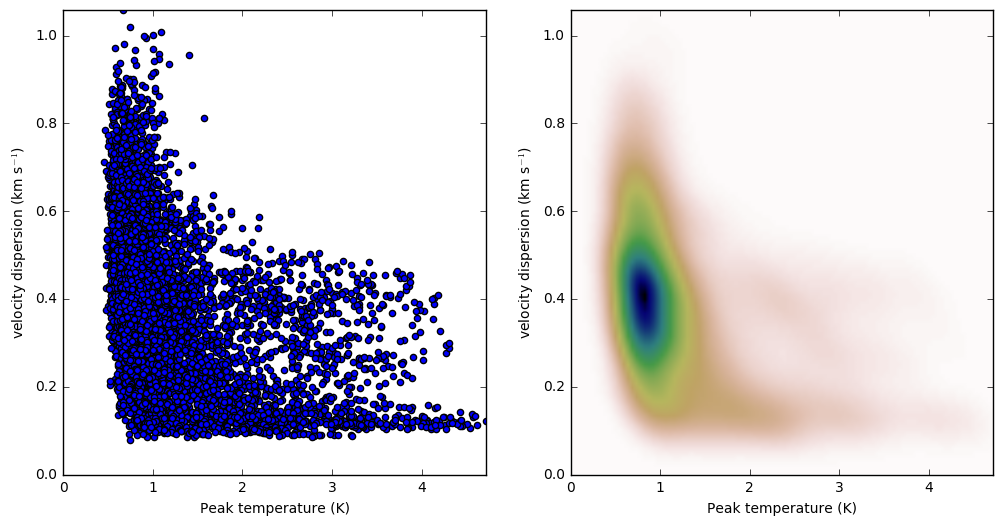

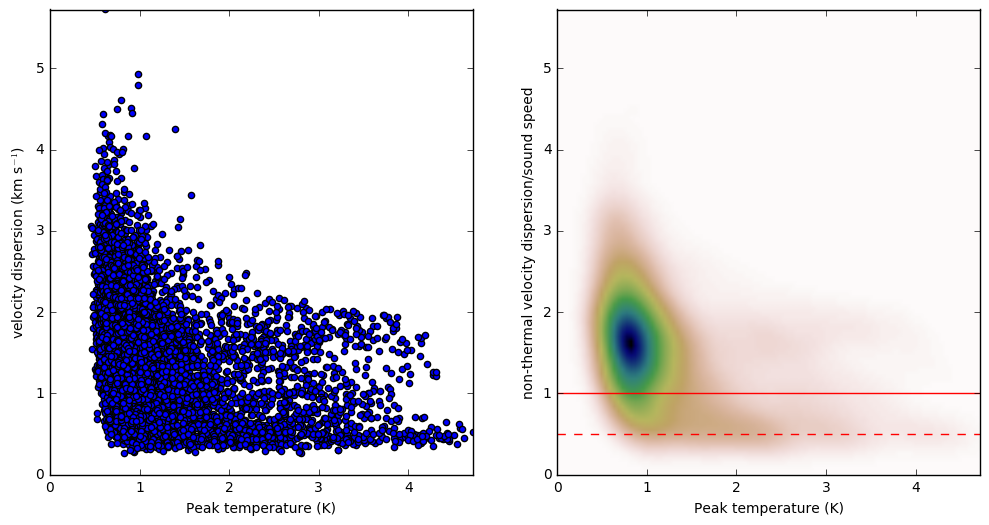

In [6]:
transition_plots(region='L1688')

## OrionA

/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


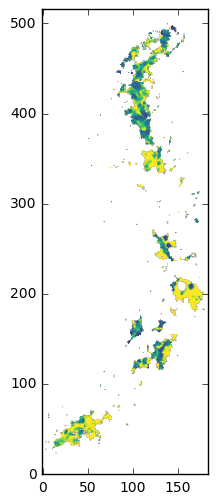

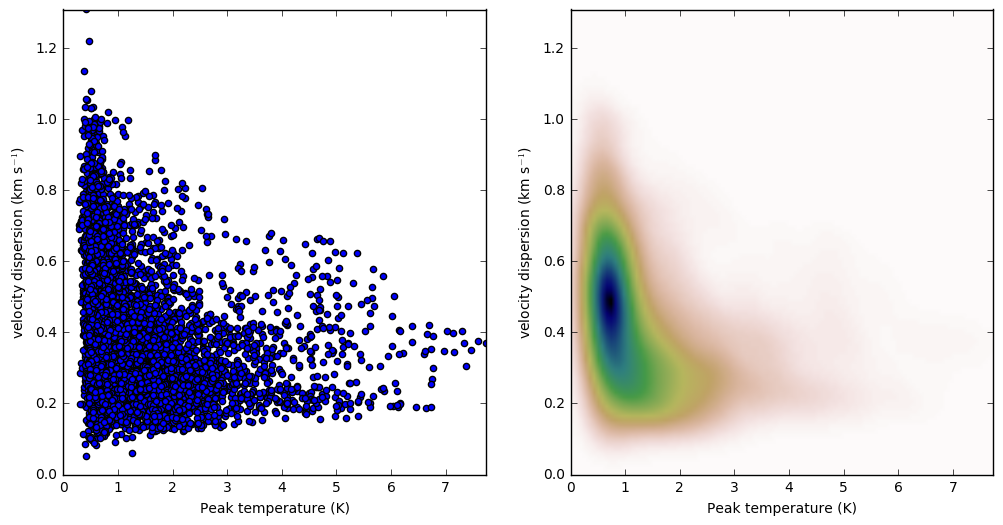

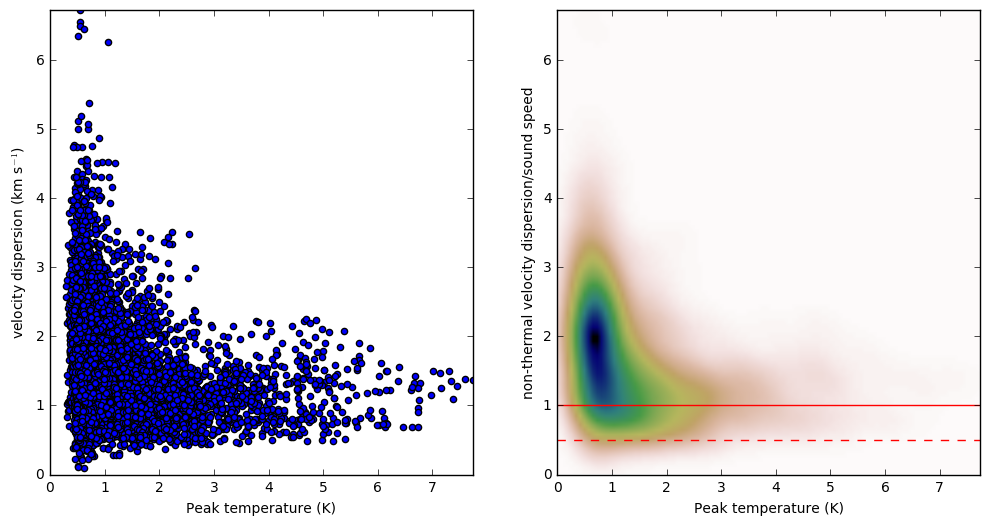

In [7]:
transition_plots(region='OrionA')

## L1495-B218

/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in sqrt
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in greater
/Users/jpineda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


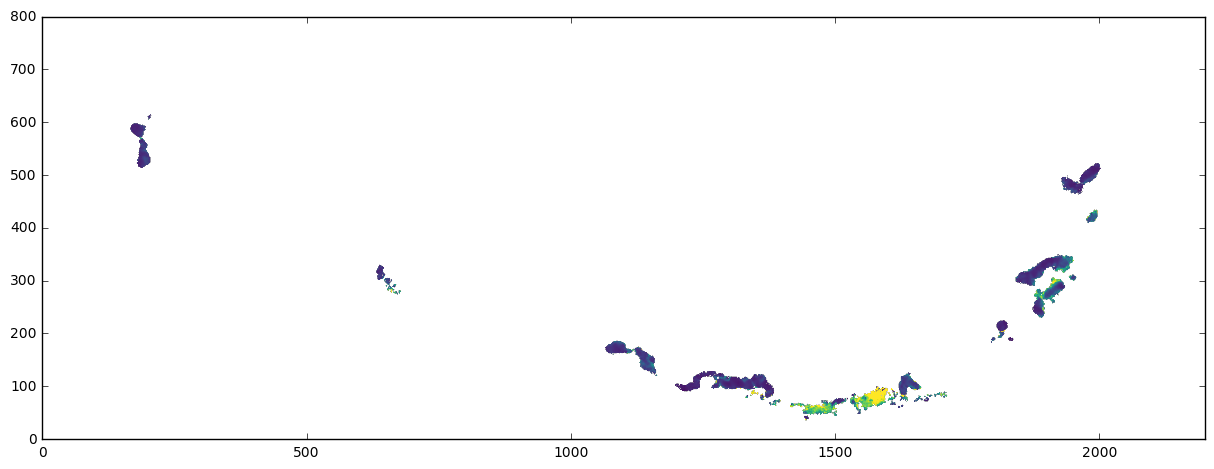

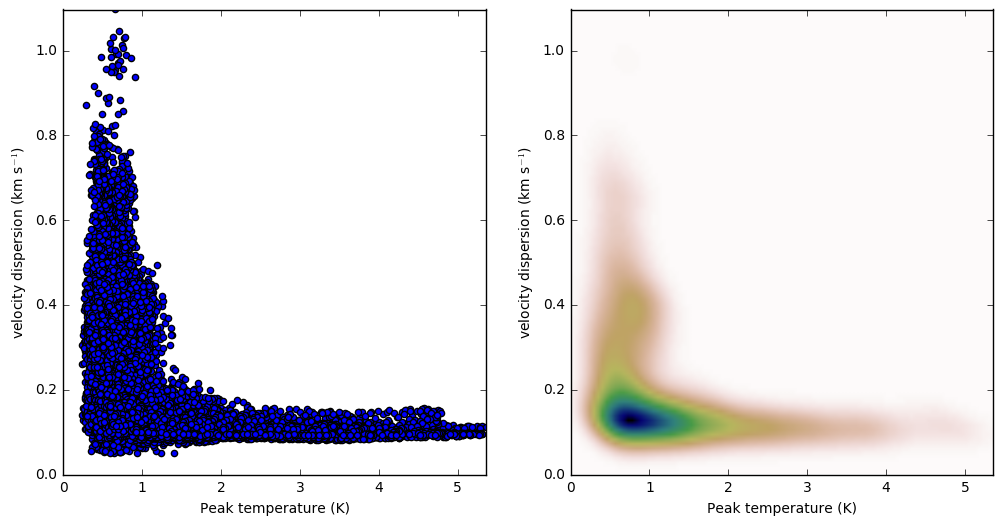

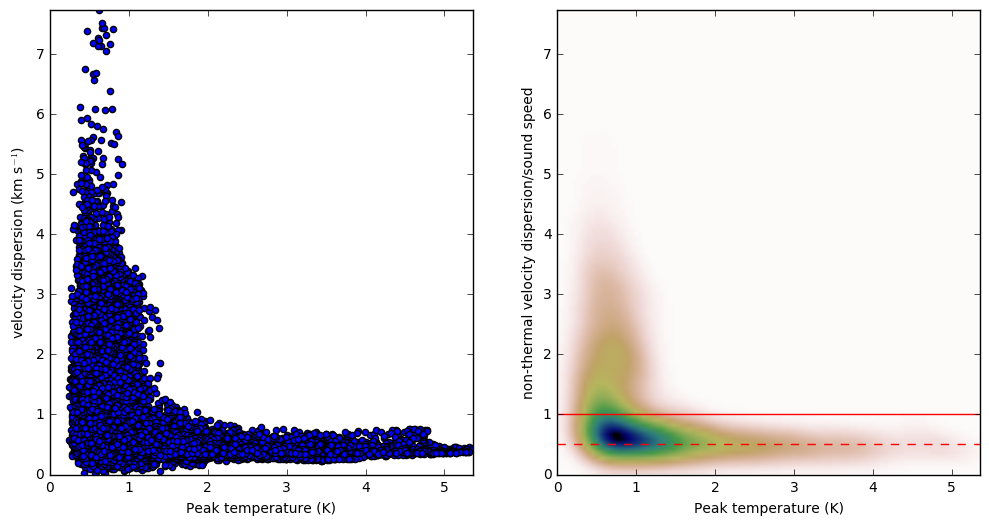

In [6]:
transition_plots(region='L1495-B218')